# Conexión a Azure Quantum y envío del trabajo

Suponemos que ya hemos realizado todos los pasos para usar AzureQPU:

    - Crear una cuenta en Azure
    - Suscribir un programa gratuito o de pago
    - Crear un servicio de Azure Quantum creando previamente un espacio de trabajo. 

Hecho esto ya solo tendría que establecer la conexión mediante mi identificador de recurso y localización de ejecución. 

    - MyResourceID
    - MyLocation


**Nota:** En el documento CREACIÓN DE CUENTA AZURE QUANTUM se explica cómo crear un área de trabajo:

https://mega.nz/file/MiMlCKJA#l1VMMoEwtq3UHLlgiCJiu4nSMEgS31V_cw0zY2tJobQ

## Instalación del Azure Quantum Developer Kit 


Podemos instalar el QDK de Azure Quantum en Python para Q#, Qiskit, Cirq:

https://learn.microsoft.com/es-es/azure/quantum/install-overview-qdk

Para Qiskit:

%pip install qsharp azure-quantum[qiskit]    

## Envío de un programa Qiskit a Azure Quantum

https://learn.microsoft.com/es-es/azure/quantum/quickstart-microsoft-qiskit?tabs=tabid-ionq&pivots=platform-local

In [ ]:
import qiskit
import azure.quantum
from azure.quantum import Workspace 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from azure.quantum.qiskit import AzureQuantumProvider

In [ ]:
workspace = Workspace(  
    resource_id = "", # Add the resourceID of your workspace
    location = "" # Add the location of your workspace (for example "westus")
    )

provider = AzureQuantumProvider(workspace)

This workspace's targets:
- ionq.qpu
- ionq.qpu.aria-1
- ionq.simulator
- microsoft.estimator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.qpu.h1-1
- quantinuum.sim.h1-1sc
- quantinuum.sim.h1-1e
- rigetti.sim.qvm
- rigetti.qpu.ankaa-3

### Ejecutamos en un simulador de un QPU particular

Nota: hay un problema con la instalación de azure-quantum[qiskit]

El programa de abajo no funcionará hasta resolver este problema. 

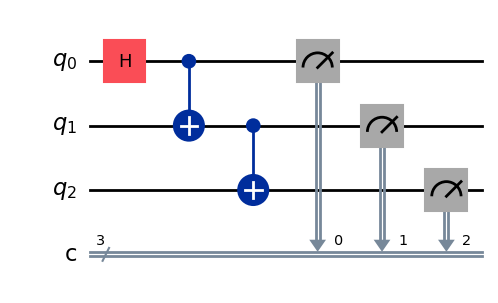

In [ ]:
from qiskit import QuantumCircuit, transpile
from azure.quantum import Workspace
from azure.quantum.qiskit import AzureQuantumProvider as provider

circuit = QuantumCircuit(3, 3)
circuit.name = "Qiskit Sample - 3-qubit GHZ circuit"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

# Print out the circuit
circuit.draw('mpl')

In [ ]:
simulator_backend = provider.get_backend("ionq.simulator")
circuit = transpile(circuit, simulator_backend)

AttributeError: 'str' object has no attribute 'backends'

In [ ]:
job = simulator_backend.run(circuit, shots=8)
job_id = job.id()
print("Job id", job_id)


In [ ]:
result = job.result()
print(result)

In [ ]:
counts = {format(n, "03b"): 0 for n in range(8)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

### Ejecutamos con un simulador

In [ ]:
# load the required imports 
from qiskit.circuit.random import random_circuit
from qsharp.interop.qiskit import QSharpBackend

#QSharpBackend es un backend de Qiskit que 
# permite ejecutar circuitos de Qiskit simulados
# usando el simulador de quantum de Q#.

# define and display the circuit
circuit = random_circuit(2, 2, measure=True)
print(circuit)

# run the circuit using the built-in sparse simulator
backend = QSharpBackend()
job = backend.run(circuit)
counts = job.result().get_counts()

print(counts)

         ┌───┐          ┌─┐   
q_0: ────┤ S ├──────────┤M├───
     ┌───┴───┴────┐┌───┐└╥┘┌─┐
q_1: ┤ U1(6.1342) ├┤ Z ├─╫─┤M├
     └────────────┘└───┘ ║ └╥┘
c: 2/════════════════════╩══╩═
                         0  1 
{'00': 1024}


Otro ejemplo

In [ ]:

%pip install azure-quantum[qiskit]

from qiskit import QuantumCircuit

from qiskit_azure_quantum import AzureQuantumProvider

#--- 1. Definir el circuito Bell ---

BellJob = QuantumCircuit(2, 2, name="BellJob")
BellJob.h(0)
BellJob.cx(0, 1)
BellJob.measure([0,1], [0,1])

# --- 2. Conectarse al workspace de Azure Quantum ---
# Sustituyo estos valores por los de mi workspace

provider = AzureQuantumProvider(
    resource_id="RESOURCE_ID_DE_TU_WORKSPACE",
    location="LOCATION_DE_TU_WORKSPACE"  # Ej: "westeurope" o "eastus"
)

#--- 3. Elegir un backend ---
# Ejemplo con simulador (puede ser "microsoft.estimator" o hardware de un partner como IonQ, Quantinuum, Rigetti...)

backend = provider.get_backend("ionq.simulator")

# --- 4. Ejecutar el job ---

job = backend.run(BellJob, shots=1000)

#--- 5. Esperar resultados ---

result = job.result()
print("Resultados de BellJob:", result.get_counts())